In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry

In [99]:
df = pd.read_csv("ds_salaries.csv")

##### work_year: Maaşın ödendiği yıl.
##### experience_level: Yıl boyunca işteki deneyim seviyesi (SE: Kıdemli, EN: Giriş seviyesi, EX: Yönetici seviyesi, MI: Orta/Orta seviye)
##### employment_type: Rol için istihdam türü (FT:'Tam Zamanlı', PT:'Yarı Zamanlı', CT:'Sözleşmeli', FL:'Serbest Çalışan')
##### job_title: Yıl boyunca çalışılan rol.
##### salary: Ödenen toplam brüt maaş tutarı.
##### salary_currency: ISO 4217 para birimi kodu olarak ödenen maaşın para birimi.
##### salary_in_usd: USD cinsinden maaş
##### employee_residence: ISO 3166 ülke kodu olarak çalışanın çalışma yılı boyunca birincil ikamet ettiği ülke.
##### remote_ratio: Uzaktan yapılan toplam iş miktarı (0 : Uzaktan çalışma yok, 50 : Kısmen uzak, 100 : Tamamen uzak)
##### company_location: İşverenin ana ofisi veya sözleşmeli şubesinin bulunduğu ülke
##### company_size: Yıl boyunca şirket için çalışan ortalama kişi sayısı

In [100]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [101]:
df.shape

(3755, 11)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [104]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [105]:
df["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [106]:
# experience_level sütununu daha okunabilir bir hale getiriyorum
df["experience_level"] = df["experience_level"].replace("EN", "Entry-level")
df["experience_level"] = df["experience_level"].replace("MI", "Mid-level")
df["experience_level"] = df["experience_level"].replace("SE", "Senior-level")
df["experience_level"] = df["experience_level"].replace("EX", "Executive-level")

In [107]:
df["employment_type"].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [108]:
# employment_type sütununu daha okunabilir bir hale getiriyorum
df["employment_type"] = df["employment_type"].replace("FT", "Full-Time")
df["employment_type"] = df["employment_type"].replace("PT", "Part-Time")
df["employment_type"] = df["employment_type"].replace("CT", "Contract")
df["employment_type"] = df["employment_type"].replace("FL", "Freelance")

In [109]:
df["salary_currency"].unique()

array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

In [110]:
df["company_size"].unique()

array(['L', 'S', 'M'], dtype=object)

In [111]:
# company_size sütununu daha okunabilir bir hale getiriyorum
df["company_size"] = df["company_size"].replace("S", "Small")
df["company_size"] = df["company_size"].replace("M", "Medium")
df["company_size"] = df["company_size"].replace("L", "Large")

In [112]:
df["work_year"].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

In [113]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,US,100,US,Small
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,US,100,US,Small
3,2023,Senior-level,Full-Time,Data Scientist,175000,USD,175000,CA,100,CA,Medium
4,2023,Senior-level,Full-Time,Data Scientist,120000,USD,120000,CA,100,CA,Medium
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior-level,Full-Time,Data Scientist,412000,USD,412000,US,100,US,Large
3751,2021,Mid-level,Full-Time,Principal Data Scientist,151000,USD,151000,US,100,US,Large
3752,2020,Entry-level,Full-Time,Data Scientist,105000,USD,105000,US,100,US,Small
3753,2020,Entry-level,Contract,Business Data Analyst,100000,USD,100000,US,100,US,Large


## Yıllara göre en iyi 10 meslek durumu

In [114]:
df["job_title"].nunique()

93

In [115]:
df["job_title"].value_counts().head(10)

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

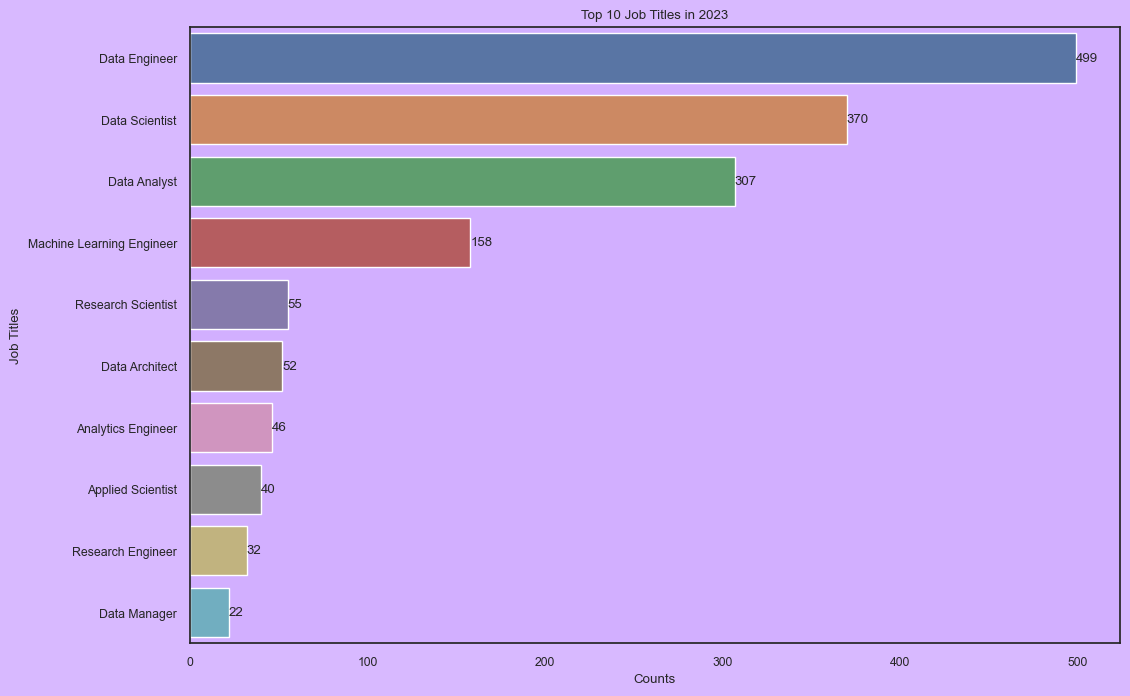

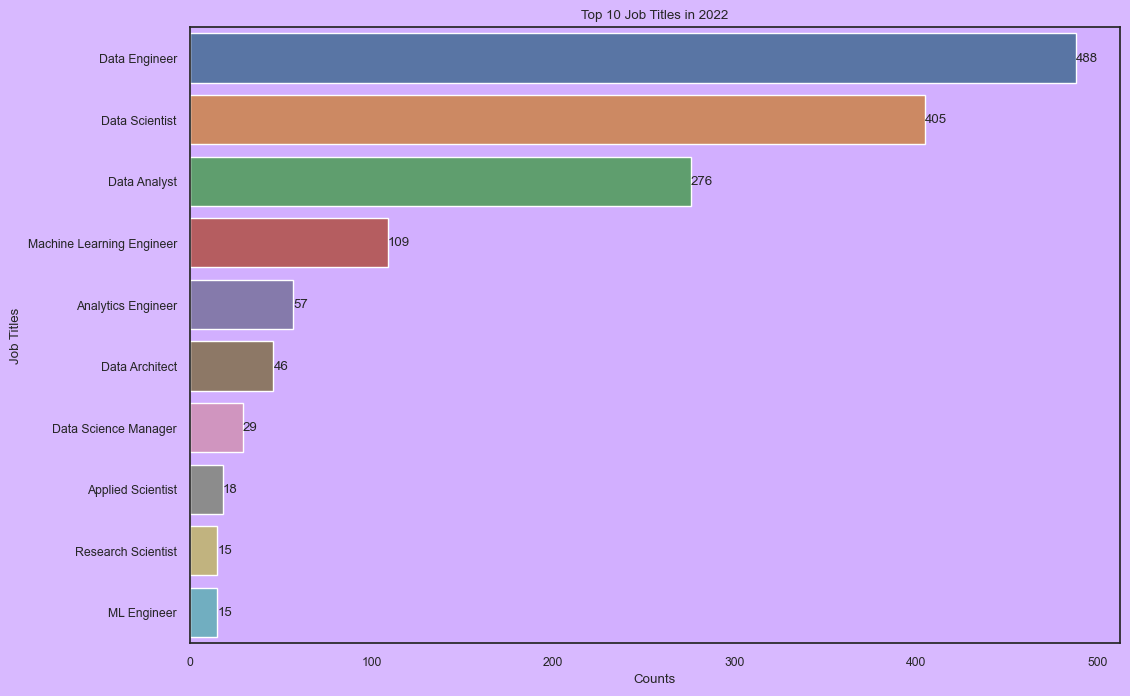

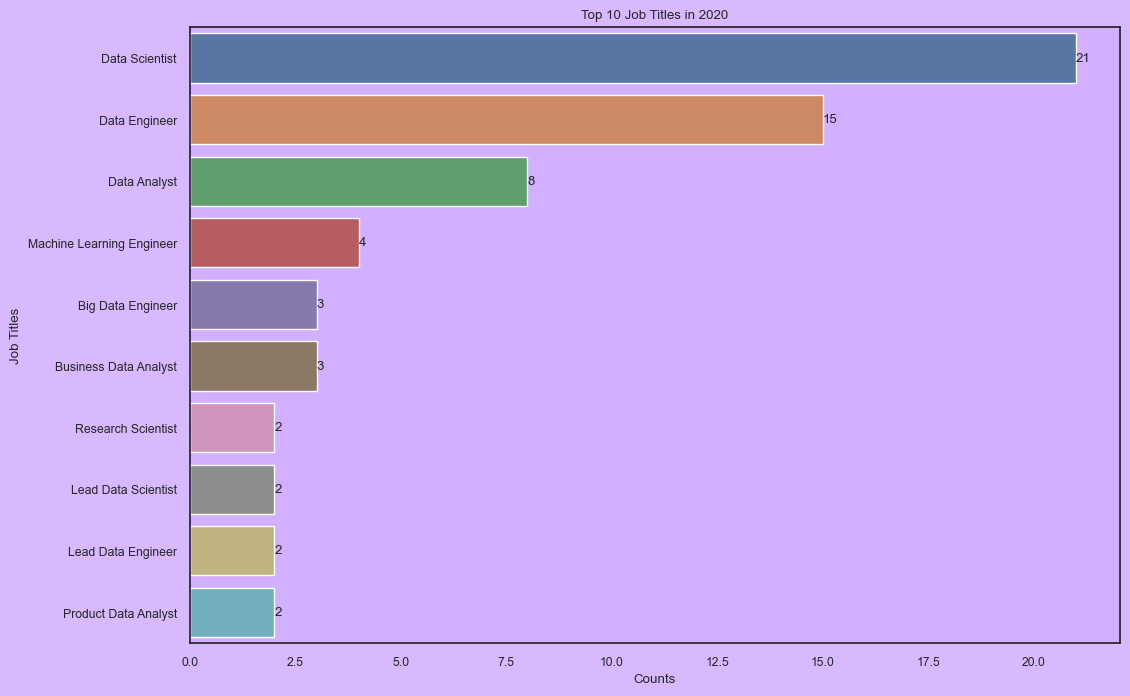

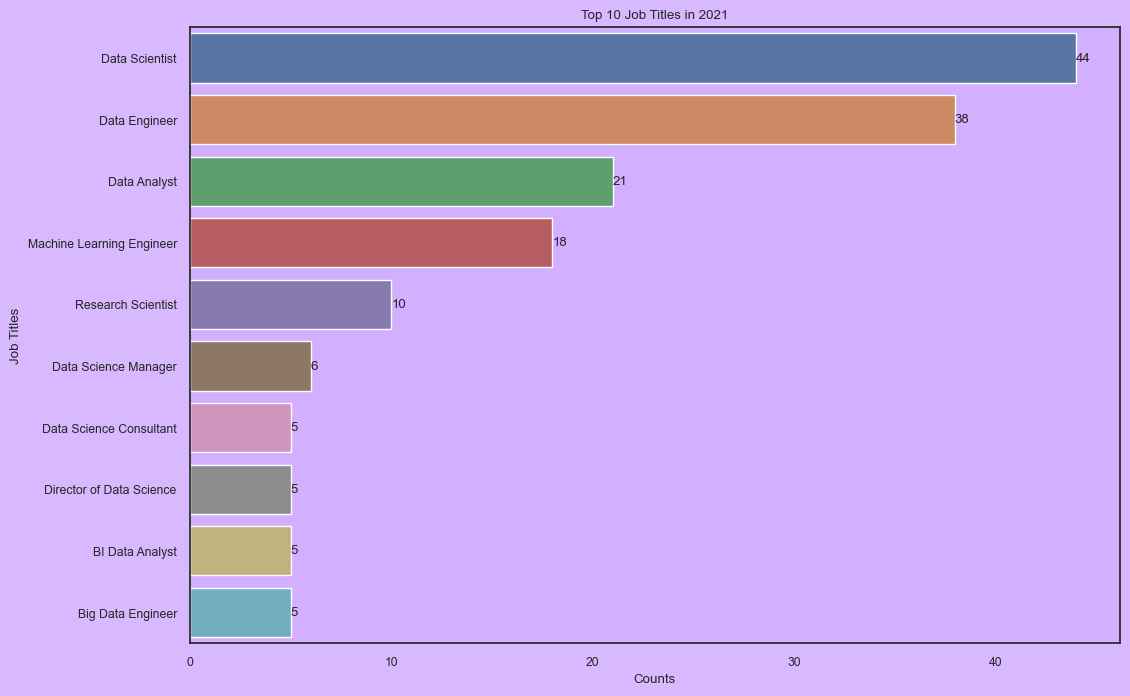

In [116]:
for i in df["work_year"].unique():
    plt.figure(facecolor = "#D8B9FF", figsize=(12,8))
    ax = sns.barplot(y = df[df["work_year"] == i]["job_title"].value_counts().head(10).index,
                     x = df[df["work_year"] == i]["job_title"].value_counts().head(10))
    ax.set(ylabel="Job Titles", xlabel="Counts", title=f"Top 10 Job Titles in {i}")
    ax.set_facecolor("#D2AFFF")
    ax.bar_label(ax.containers[0])
    plt.show()

## Deneyim düzeyine göre istihdam türü sayısı

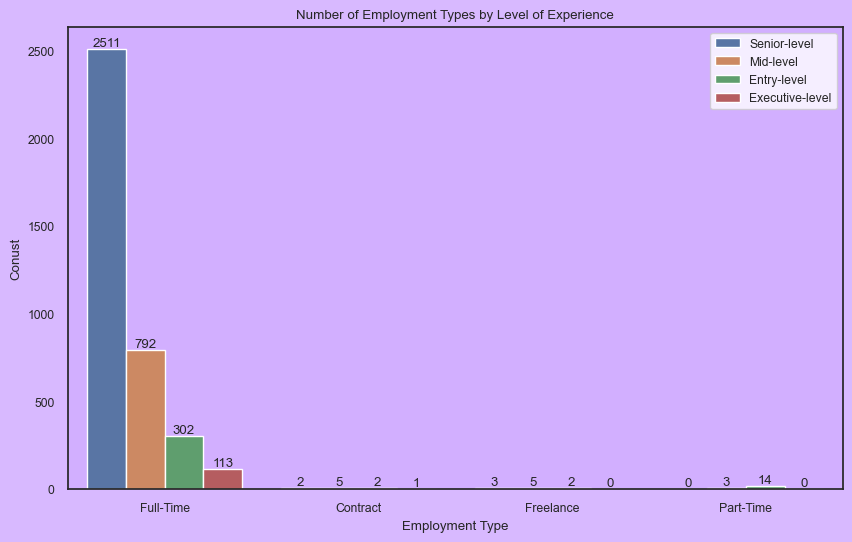

In [117]:
plt.figure(facecolor="#D8B9FF", figsize=(10,6))
ax = sns.countplot(data = df, x = "employment_type", hue = "experience_level")
ax.set(xlabel="Employment Type", ylabel="Conust", title="Number of Employment Types by Level of Experience")
ax.set_facecolor("#D2AFFF")
plt.legend(loc = 1)
for i in [0,1,2,3]:
    ax.bar_label(ax.containers[i])
plt.show()    

##### Grafikte de görüldüğü gibi insanların çoğu tam zamanlı çalışıyor ve bunlar arasında senior developer oranı daha fazla.

## Şirket lokasyonuna göre maaş dağılımı

In [118]:
df["company_location"].nunique()

72

In [119]:
df["company_location"].value_counts().head(10)

US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
Name: company_location, dtype: int64

In [120]:
top_company = df["company_location"].value_counts().head(5).index.tolist()
top_company

['US', 'GB', 'CA', 'ES', 'IN']

In [121]:
df_top_company = df[df["company_location"].isin(top_company)]
df_top_company.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large
1,2023,Mid-level,Contract,ML Engineer,30000,USD,30000,US,100,US,Small
2,2023,Mid-level,Contract,ML Engineer,25500,USD,25500,US,100,US,Small


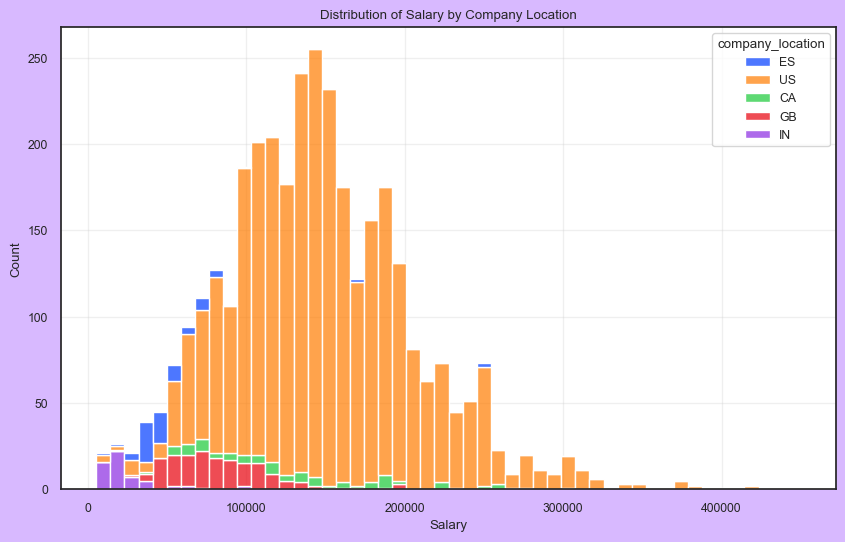

In [122]:
plt.figure(facecolor="#D8B9FF", figsize=(10,6))
sns.histplot(x = "salary_in_usd", hue = "company_location", data = df_top_company, multiple="stack", 
            alpha=0.7, bins=50, palette="bright")
plt.grid(alpha=0.3)
plt.title("Distribution of Salary by Company Location")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

##### En yüksek maaşların ABD'de, en düşük maaşların da Hindistan'da olduğunu görüyoruz.

## Şirket büyüklüğüne göre ortalama maaş

In [123]:
company_size_salary = df.groupby("company_size")["salary_in_usd"].mean().round(0).sort_values(ascending=False).reset_index()
company_size_salary

,company_size,salary_in_usd
0,Medium,143131.0
1,Large,118301.0
2,Small,78227.0


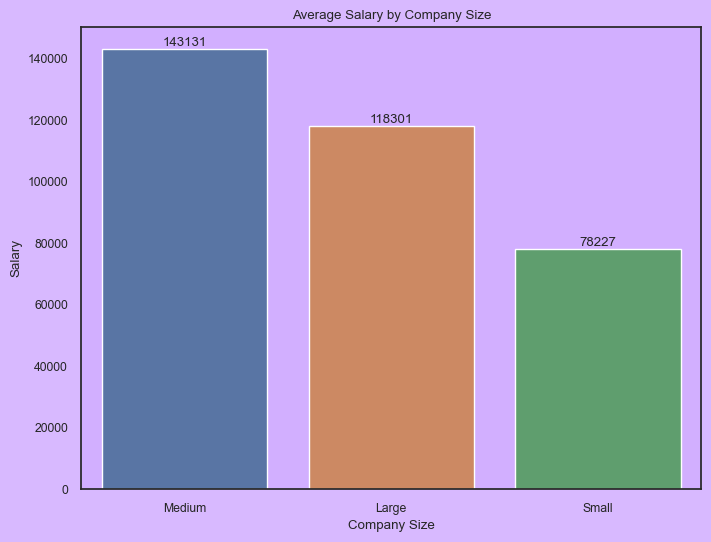

In [124]:
plt.figure(facecolor="#D8B9FF", figsize=(8,6))
ax = sns.barplot(x = "company_size", y = "salary_in_usd", data = company_size_salary)
ax.set(xlabel="Company Size", ylabel="Salary", title="Average Salary by Company Size")
ax.set_facecolor("#D2AFFF")
ax.bar_label(ax.containers[0])
plt.show()

#### Orta büyüklükteki şirketlerde daha çok maaş alınırken, küçük şirketlerde bu oran daha azdır.

## Remote çalışmaya göre ortalama maaş

In [125]:
remote_ratio_salary = df.groupby("remote_ratio")["salary_in_usd"].mean().round(0).head(15).sort_values(ascending=False).reset_index()
remote_ratio_salary

,remote_ratio,salary_in_usd
0,0,144316.0
1,100,136481.0
2,50,78401.0


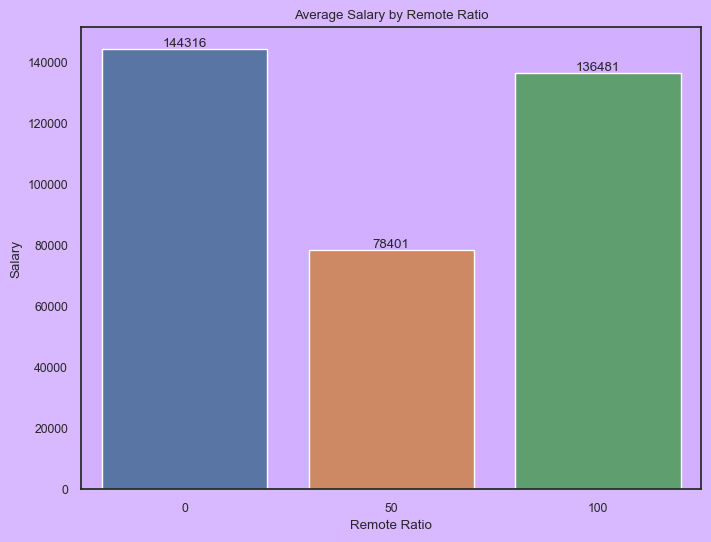

In [126]:
plt.figure(facecolor="#D8B9FF", figsize=(8,6))
ax = sns.barplot(x = "remote_ratio", y = "salary_in_usd", data = remote_ratio_salary)
ax.set(xlabel="Remote Ratio", ylabel="Salary", title="Average Salary by Remote Ratio")
ax.set_facecolor("#D2AFFF")
ax.bar_label(ax.containers[0])
plt.show()

#### Uzaktan ve ofiste çalışanların maaşı hemen hemen aynıyken, hibrit çalışanlarınki çok daha az oluyor.

## Tecrübe düzeyine göre ortalama maaş

In [127]:
experience_level_salary = df.groupby("experience_level")["salary_in_usd"].mean().round(0).sort_values(ascending=False).reset_index()
experience_level_salary

,experience_level,salary_in_usd
0,Executive-level,194931.0
1,Senior-level,153051.0
2,Mid-level,104526.0
3,Entry-level,78546.0


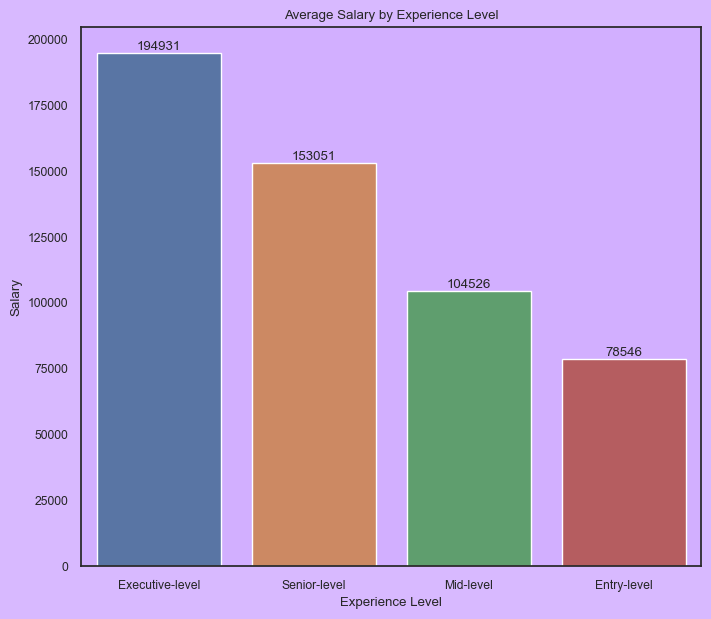

In [128]:
plt.figure(facecolor="#D8B9FF", figsize=(8,7))
ax = sns.barplot(x = "experience_level", y = "salary_in_usd", data = experience_level_salary)
ax.set(xlabel="Experience Level", ylabel="Salary", title="Average Salary by Experience Level")
ax.set_facecolor("#D2AFFF")
ax.bar_label(ax.containers[0])
plt.show()

#### Yöneticilerin maaş ortalaması 194.000 dolar iken, yeni başlayanlar ortalama 78.000 dolar alıyor.

## İstihdam türüne göre yıllık dolar cinsinden ortalama maaş

In [129]:
avg_salary = df.groupby("employment_type")["salary_in_usd"].mean().sort_values(ascending=False).reset_index()
avg_salary

,employment_type,salary_in_usd
0,Full-Time,138314.199570
1,Contract,113446.900000
2,Freelance,51807.800000
3,Part-Time,39533.705882


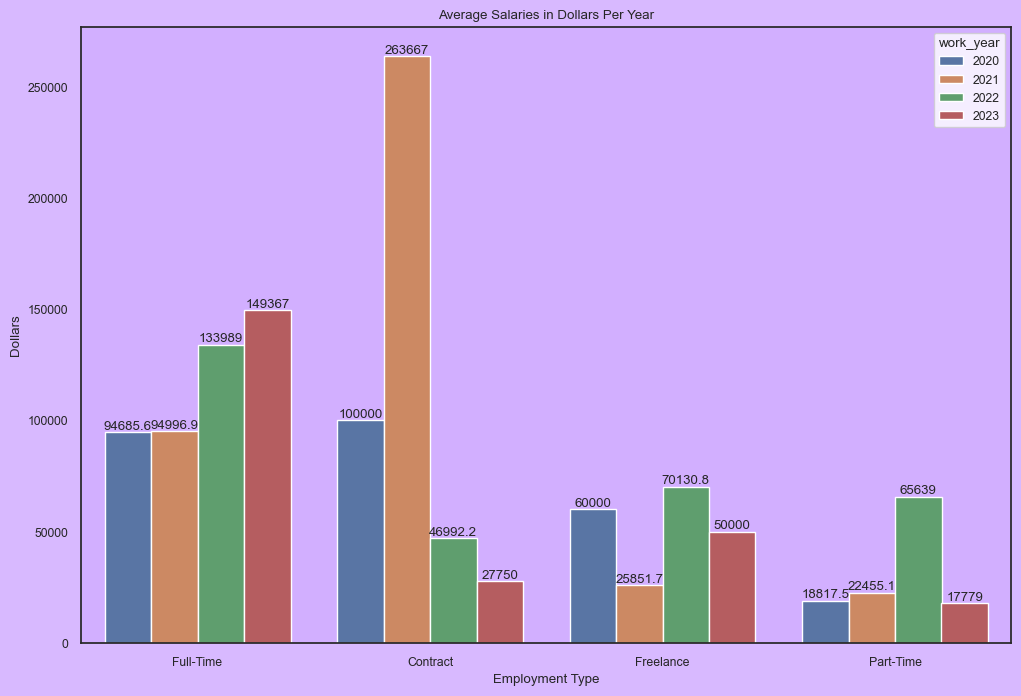

In [130]:
plt.figure(facecolor="#D8B9FF", figsize=(12,8))
ax = sns.barplot(x = "employment_type", y = "salary_in_usd", hue = "work_year", data = df, errorbar=None)
ax.set(xlabel="Employment Type", ylabel="Dollars", title="Average Salaries in Dollars Per Year")
ax.set_facecolor("#D2AFFF")

for i in [0,1,2,3]:
    ax.bar_label(ax.containers[i])
    
plt.show()    

#### Yıllara göre maaş skalasına baktığımızda sözleşmeli çalışanların maaşlarının azaldığını görüyoruz. Freelance çalışanların skalası artıp azalabiliyor. Full-time çalışanlarınki her yıl artıyor.

## Ortalama maaşlara göre en iyi 15 iş unvanı

In [131]:
job_title_salary = df.groupby("job_title")["salary_in_usd"].mean().round(0).sort_values(ascending=False).reset_index().head(15)
job_title_salary

,job_title,salary_in_usd
0,Data Science Tech Lead,375000.0
1,Cloud Data Architect,250000.0
2,Data Lead,212500.0
3,Data Analytics Lead,211254.0
4,Principal Data Scientist,198171.0
5,Director of Data Science,195141.0
6,Principal Data Engineer,192500.0
7,Machine Learning Software Engineer,192420.0
8,Data Science Manager,191279.0
9,Applied Scientist,190264.0


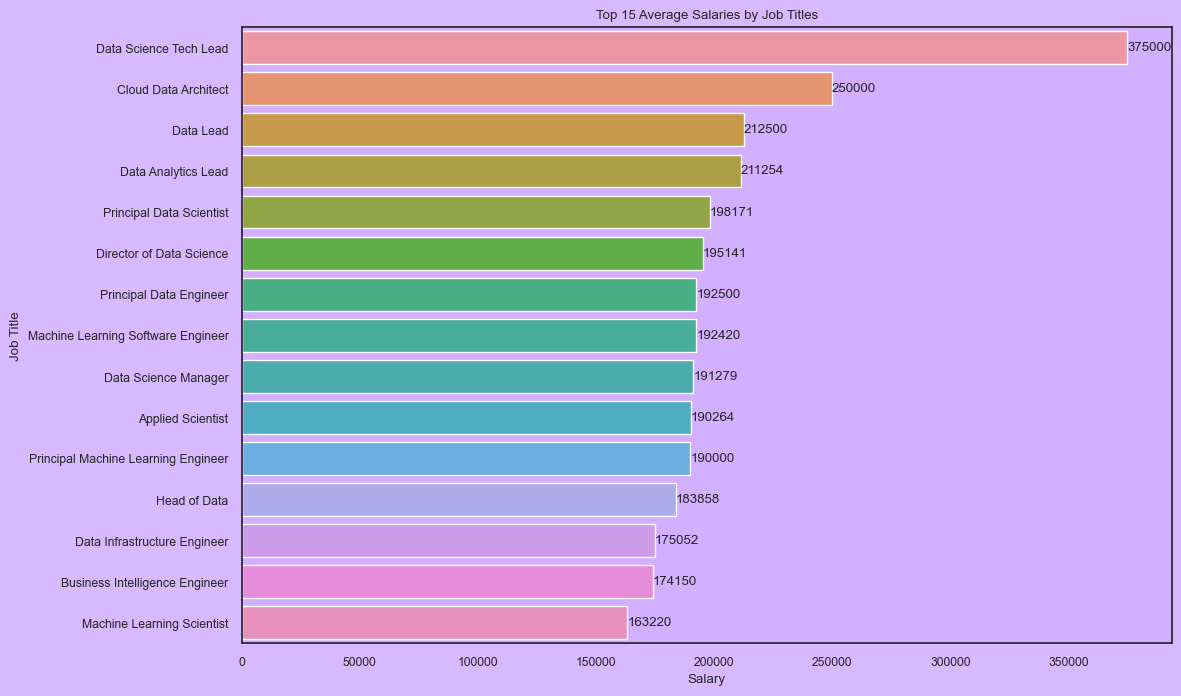

In [132]:
plt.figure(facecolor="#D8B9FF", figsize=(12,8))
ax = sns.barplot(y = "job_title", x = "salary_in_usd", data = job_title_salary)
ax.set(ylabel="Job Title", xlabel="Salary", title="Top 15 Average Salaries by Job Titles")
ax.set_facecolor("#D2AFFF")
ax.bar_label(ax.containers[0])
plt.show()

##### Yönetici kademesinde istihdam edenlerin ortalama maaşların yüksek olması beklenendir. Bulut Veri Mimarı da en yüksek ücretli ikinci meslektir.

## Yıllık dolar cinsinden ortalama maaşlar

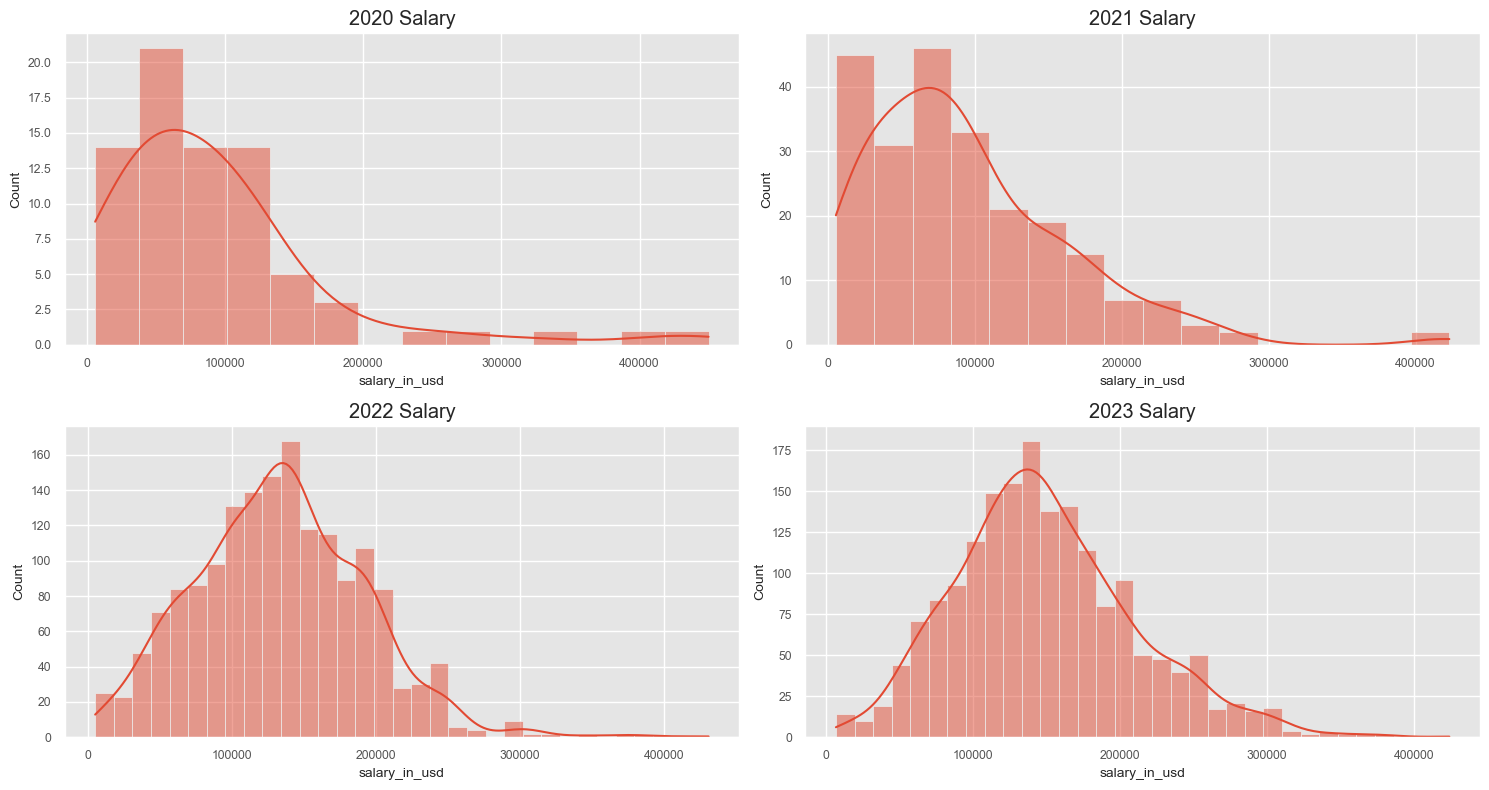

In [133]:
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.histplot(data = df, x = df[df["work_year"] == 2020]["salary_in_usd"], kde = True)
plt.title("2020 Salary")
plt.subplot(222)
sns.histplot(data = df, x = df[df["work_year"] == 2021]["salary_in_usd"], kde = True)
plt.title("2021 Salary")
plt.subplot(223)
sns.histplot(data = df, x = df[df["work_year"] == 2022]["salary_in_usd"], kde = True)
plt.title("2022 Salary")
plt.subplot(224)
sns.histplot(data = df, x = df[df["work_year"] == 2023]["salary_in_usd"], kde = True)
plt.title("2023 Salary")
plt.tight_layout();
plt.show()

In [134]:
year_based_salary = df.groupby("work_year")["salary_in_usd"].mean()
year_based_salary

work_year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: salary_in_usd, dtype: float64

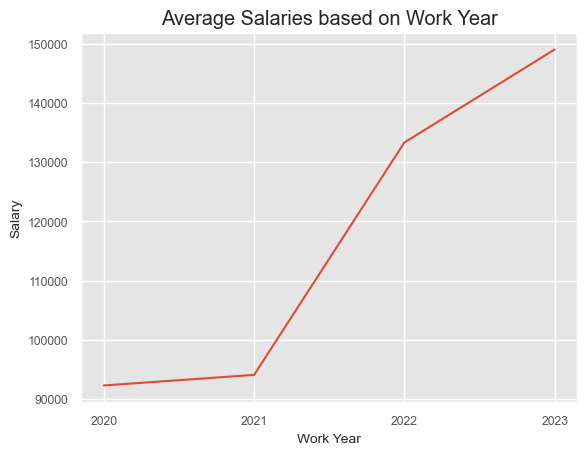

In [135]:
sns.lineplot(x = ["2020", "2021", "2022", "2023"], y = year_based_salary)
plt.title("Average Salaries based on Work Year")
plt.xlabel("Work Year")
plt.ylabel("Salary")
plt.show()

##### Gördüğünüz gibi veriye dayalı meslek maaşları her geçen yıl artıyor. 2021 ile 2022 yılları arasındaki artış da dikkat çekici.

## Çalışan ikametgahı ve şirket konumu arasındaki maaş ilişkisi

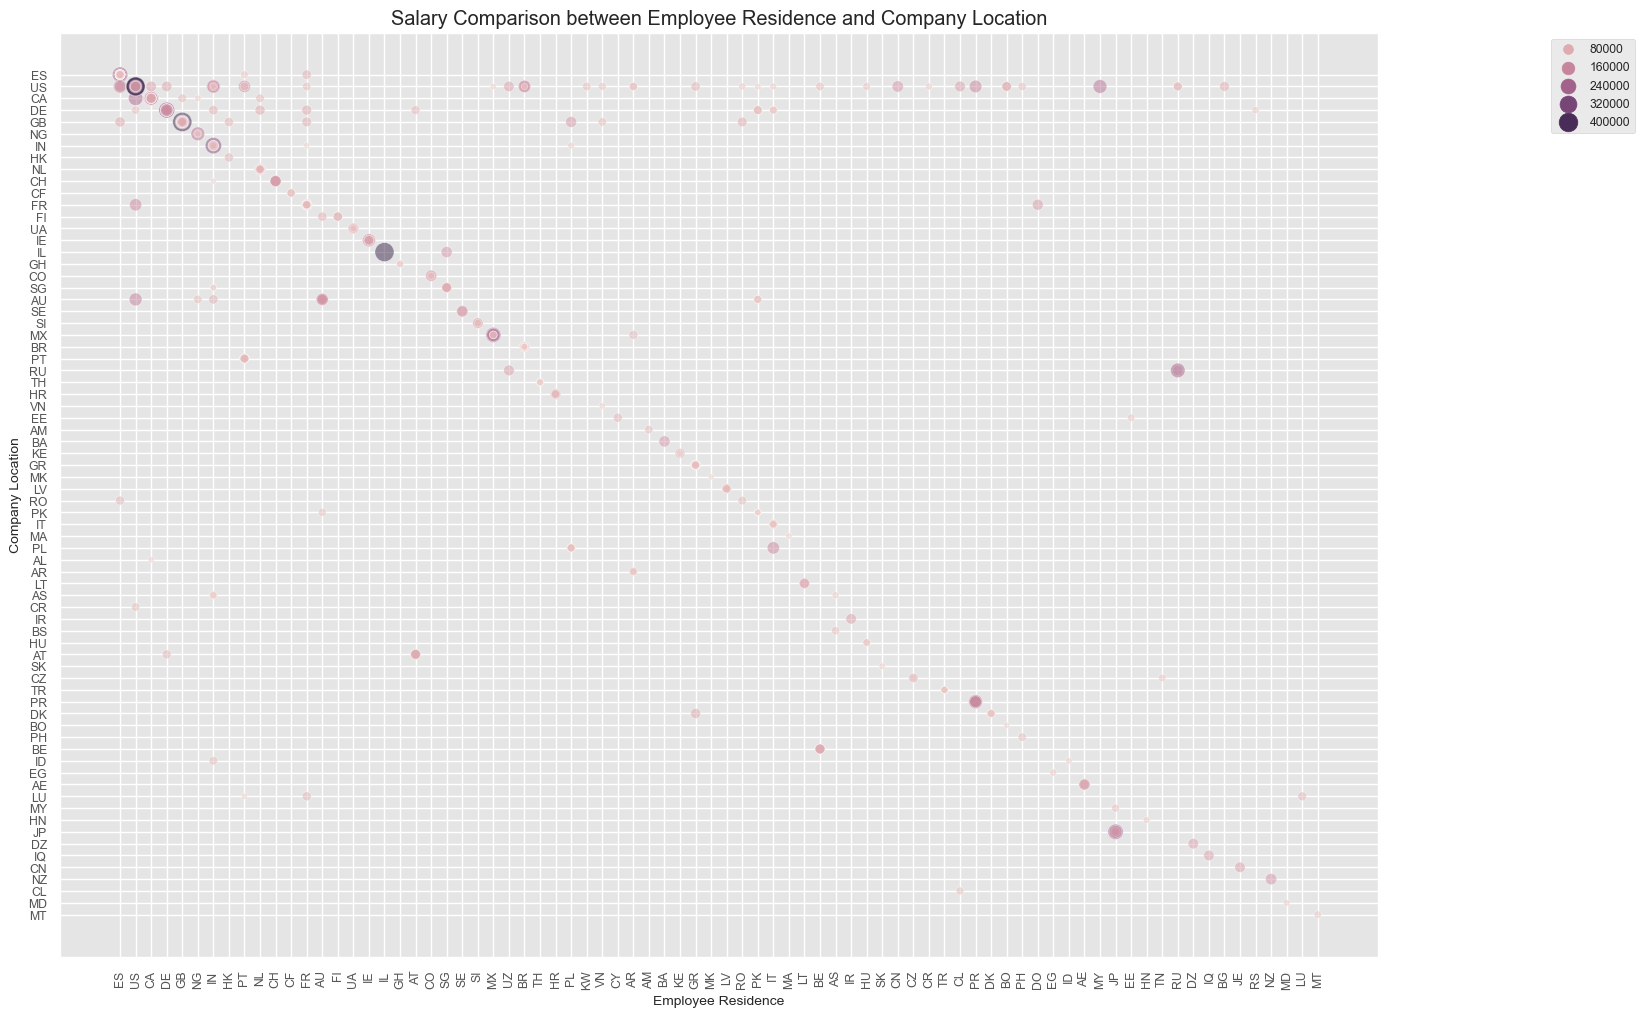

In [136]:
plt.figure(figsize=(17,12))
sns.scatterplot(x = "employee_residence", y = "company_location", hue = "salary_in_usd", data = df, size = "salary_in_usd", 
               sizes=(20,200), alpha=0.5)
plt.title("Salary Comparison between Employee Residence and Company Location")
plt.xlabel("Employee Residence")
plt.ylabel("Company Location")
plt.xticks(rotation=90)
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.show()

In [137]:
#2 harfli ülke kodlarını ülke adlarına dönüştürüyorum.
def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return country_code
def country_code_to_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name
    except:
        return None

## Şirket konumuna göre ortalama maaş

In [138]:
df["company_location"] = df["company_location"].apply(country_code_to_name)
df["employee_residence"] = df["employee_residence"].apply(country_code_to_name)

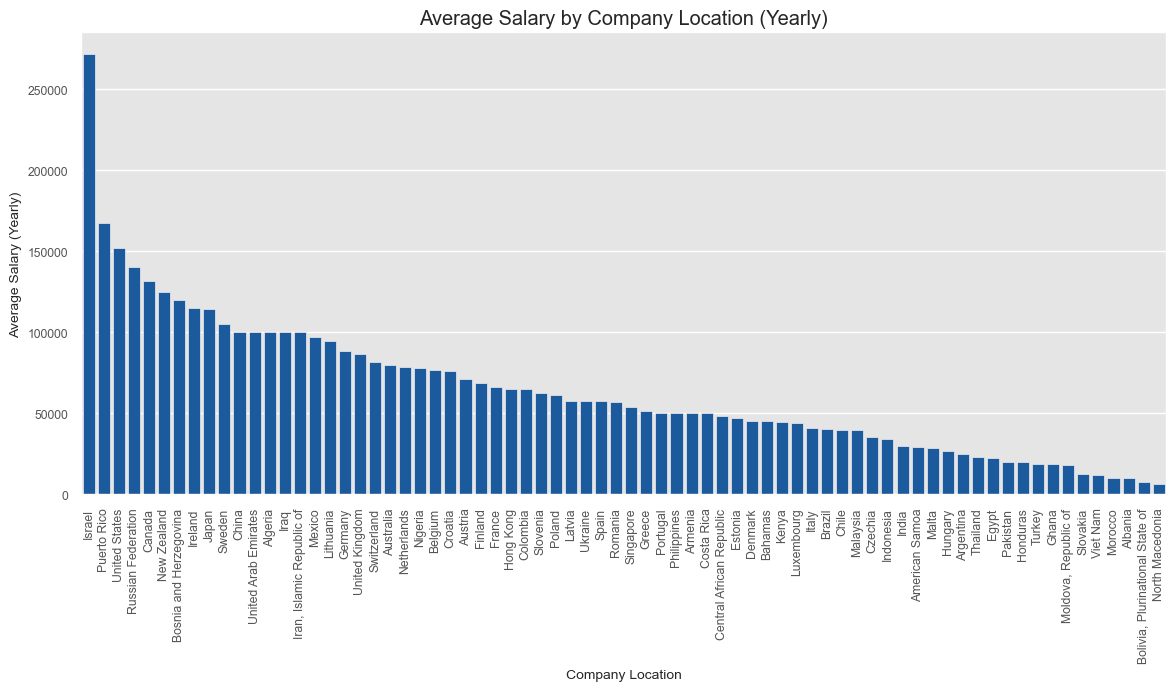

In [139]:
company_location_salary = df.groupby("company_location", as_index=False)["salary_in_usd"].mean()

fig1 = px.choropleth(company_location_salary,
                    locations="company_location",
                    locationmode="country names",
                    color="salary_in_usd",
                    hover_name="company_location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Average Salary by Company Location",
                    labels={"salary_in_usd":"Average Salary"},
                    projection="natural earth")
fig1.show()

company_location_salary2 = df.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x = company_location_salary2.index, y = company_location_salary2, color = "#0659B1")
plt.title("Average Salary by Company Location (Yearly)")
plt.xlabel("Company Location")
plt.ylabel("Average Salary (Yearly)")
plt.xticks(rotation=90)
plt.show()

## Çalışan ikametgahına göre ortalama maaş

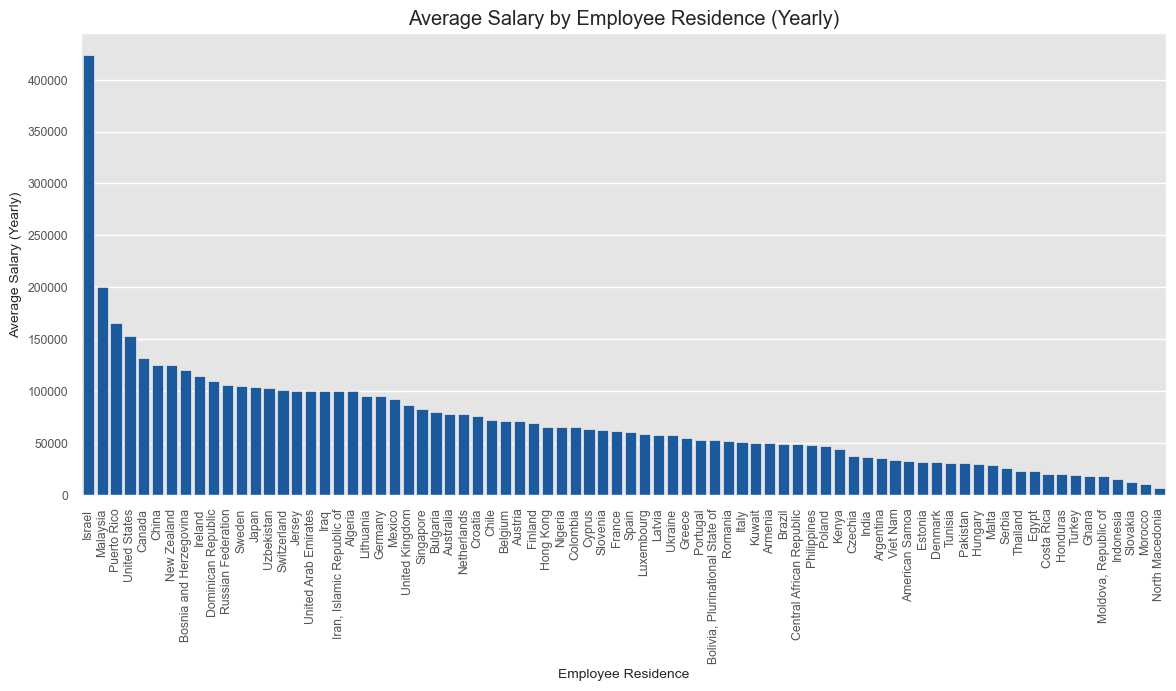

In [140]:
employee_residence_salary = df.groupby("employee_residence", as_index=False)["salary_in_usd"].mean()

fig2 = px.choropleth(employee_residence_salary,
                    locations="employee_residence",
                    locationmode="country names",
                    color="salary_in_usd",
                    hover_name="employee_residence",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Average Salary by Employee Residence",
                    projection="natural earth")
fig2.show()

employee_residence_salary2 = df.groupby("employee_residence")["salary_in_usd"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x = employee_residence_salary2.index, y = employee_residence_salary2, color = "#0659B1")
plt.title("Average Salary by Employee Residence (Yearly)")
plt.xlabel("Employee Residence")
plt.ylabel("Average Salary (Yearly)")
plt.xticks(rotation=90)
plt.show()

##### Bu verilere bakıldığında veri bilimcilerin yılda ortalama 50.000 ile 150.000 dolar arasında kazandığını görüyoruz. Ortalamanın çok üstünde ya da altında kazananlar da var tabii..

##### Şirket konumuna göre İsrail, Amerika, Rusya, Kanada gibi ülkelerin daha fazla kazandığı görülürken, Pakistan, Türkiye, Vietnam gibi ülkelerin de oldukça az kazandığını görüyoruz.

##### Çalışan ikametgahına göre kazançlara bakarsak İsrail, Malezya, Çin gibi ülkeler fazla kazanırken, Kuzey Makedonya, Türkiye, Tunus gibi ülkelerin de az kazandığını görüyoruz.

## Korelasyon

In [141]:
categorical_columns = ["experience_level", "employment_type", "company_size"]
numerical_columns = ["remote_ratio", "salary_in_usd"]

In [142]:
dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
sc = StandardScaler()
scaled_numerical = sc.fit_transform(df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [145]:
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

In [146]:
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

In [147]:
processed_df = processed_df.drop(["work_year", "salary"], axis=1)

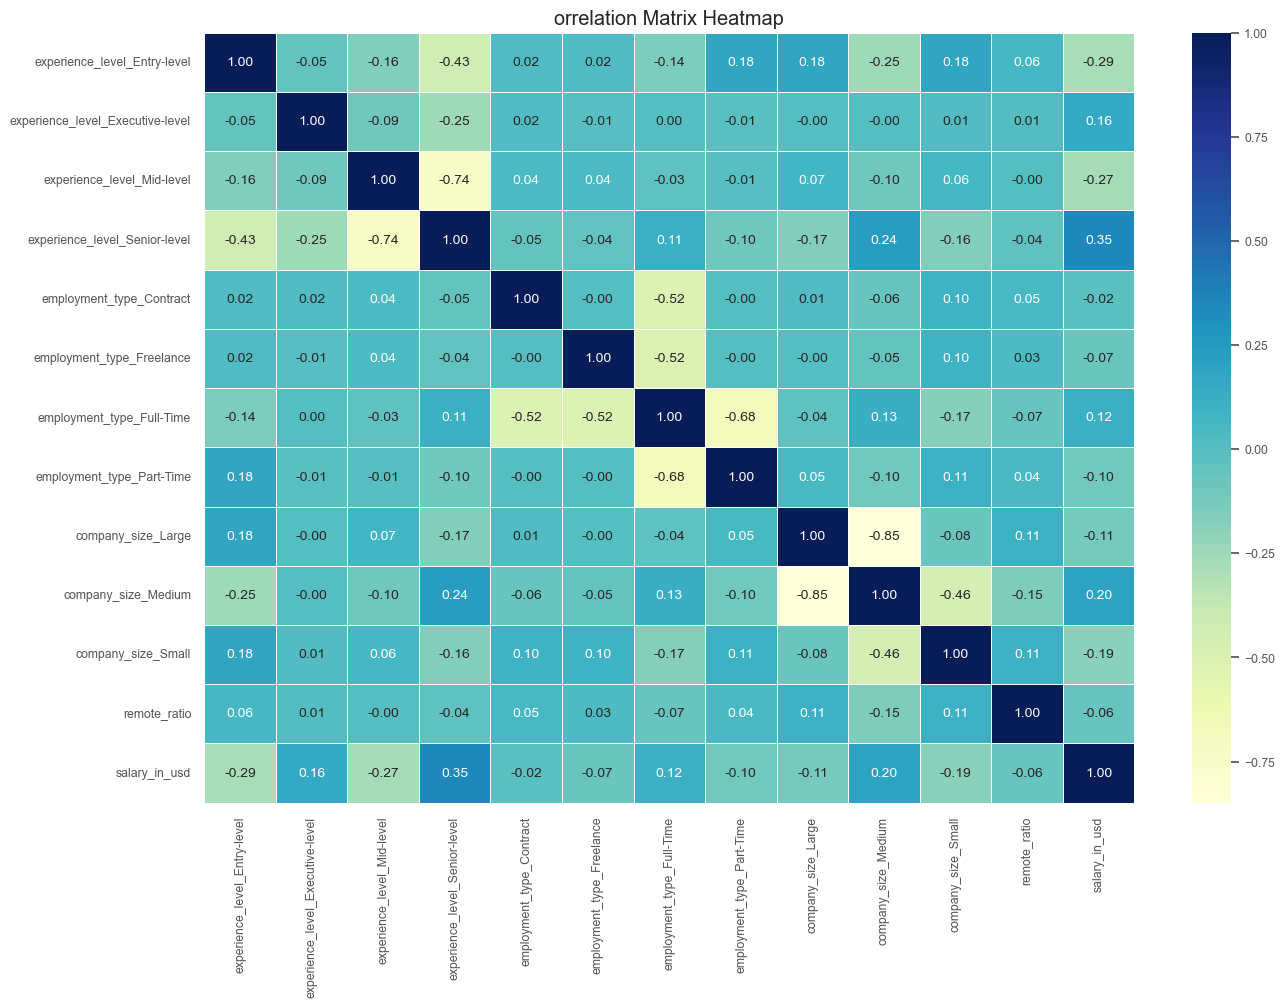

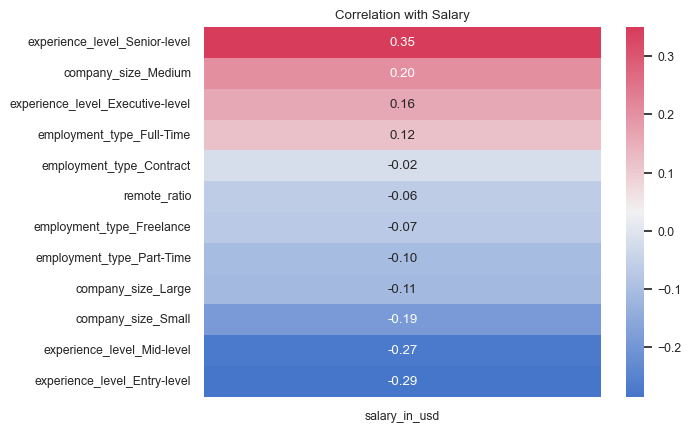

In [148]:
correlation_matrix = processed_df.corr(numeric_only=True)

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, fmt = ".2f")
plt.title("orrelation Matrix Heatmap")
plt.show()

corr = processed_df.corr(numeric_only=True)
target_corr = corr["salary_in_usd"].drop("salary_in_usd")
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.heatmap(target_corr_sorted.to_frame(), cmap=sns.diverging_palette(255, 5, as_cmap=True), annot=True, fmt=".2f")
plt.title("Correlation with Salary")
plt.show()

## Makine Öğrenmesi

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [150]:
dont_merge = ["Data Engineer", "Data Scientist", "Data Analyst", "Machine Learning Engineer"]
processed_df["job_title_m"] = df["job_title"].apply(lambda x: x
                                         if x in dont_merge
                                         else "Other")
processed_df["company_location_m" ] = df["company_location"].apply(lambda x: x
                                                        if x == "United States"
                                                        else "N_US")

In [151]:
processed_df = pd.get_dummies(processed_df)

In [152]:
processed_df

,experience_level_Entry-level,experience_level_Executive-level,experience_level_Mid-level,experience_level_Senior-level,employment_type_Contract,employment_type_Freelance,employment_type_Full-Time,employment_type_Part-Time,company_size_Large,company_size_Medium,...,company_location_United Kingdom,company_location_United States,company_location_Viet Nam,job_title_m_Data Analyst,job_title_m_Data Engineer,job_title_m_Data Scientist,job_title_m_Machine Learning Engineer,job_title_m_Other,company_location_m_N_US,company_location_m_United States
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3751,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3752,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3753,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1


In [153]:
y = processed_df["salary_in_usd"].values
X = processed_df.drop(["salary_in_usd"], axis=1).values

In [154]:
X

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [155]:
y

array([-0.82039118, -1.70618745, -1.77756251, ..., -0.51660304,
       -0.59590867, -0.68052777])

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [157]:
X_train.shape

(2628, 282)

In [158]:
X_test.shape

(1127, 282)

In [159]:
y_train.shape

(2628,)

In [160]:
y_test.shape

(1127,)

In [161]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [162]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
model = Sequential()

model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop", loss="mse")

In [164]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
83/83 [==============================] - 2s 3ms/step - loss: 0.9441
Epoch 2/200
83/83 [==============================] - 0s 3ms/step - loss: 0.8223
Epoch 3/200
83/83 [==============================] - 0s 4ms/step - loss: 0.7199
Epoch 4/200
83/83 [==============================] - 0s 3ms/step - loss: 0.6626
Epoch 5/200
83/83 [==============================] - 0s 3ms/step - loss: 0.6272
Epoch 6/200
83/83 [==============================] - 0s 3ms/step - loss: 0.6080
Epoch 7/200
83/83 [==============================] - 0s 3ms/step - loss: 0.5965
Epoch 8/200
83/83 [==============================] - 0s 3ms/step - loss: 0.5900
Epoch 9/200
83/83 [==============================] - 0s 3ms/step - loss: 0.5834
Epoch 10/200
83/83 [==============================] - 0s 3ms/step - loss: 0.5764
Epoch 11/200
83/83 [==============================] - 0s 3ms/step - loss: 0.5697
Epoch 12/200
83/83 [==============================] - 0s 3ms/step - loss: 0.5640
Epoch 13/200
83/83 [=================

83/83 [==============================] - 0s 3ms/step - loss: 0.4925
Epoch 103/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4924
Epoch 104/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4907
Epoch 105/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4923
Epoch 106/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4910
Epoch 107/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4904
Epoch 108/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4912
Epoch 109/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4919
Epoch 110/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4911
Epoch 111/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4909
Epoch 112/200
83/83 [==============================] - 0s 3ms/step - loss: 0.4917
Epoch 113/200
83/83 [==============================] - 0s 4ms/step - loss: 0.4907
Epoch 114/200
83/83 [=========

In [165]:
loss = model.history.history["loss"]

<Axes: >

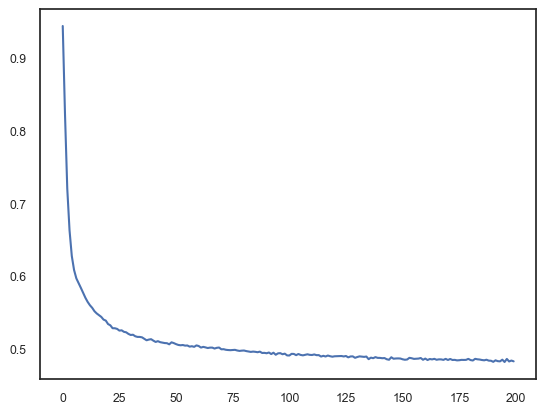

In [166]:
sns.lineplot(x = range(len(loss)), y = loss)

In [167]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
train_loss

0.47691550850868225

In [168]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
test_loss

0.6169966459274292

In [169]:
test_tahminleri = model.predict(X_test)

36/36 [==============================] - 0s 5ms/step


In [170]:
test_tahminleri

array([[ 0.50829315],
       [ 1.2544186 ],
       [-0.18923843],
       ...,
       [-1.4802804 ],
       [ 0.31932765],
       [ 0.43289435]], dtype=float32)

In [171]:
tahmin_df = pd.DataFrame(y_test, columns=["Gerçek Y"])
test_tahminleri = pd.Series(test_tahminleri.reshape(1127, ))

In [172]:
tahmin_df = pd.concat([tahmin_df, test_tahminleri], axis=1)
tahmin_df

,Gerçek Y,0
0,0.633329,0.508293
1,1.772157,1.254419
2,-0.001116,-0.189238
3,0.165425,0.930803
4,-1.677717,-1.733264
...,...,...
1122,0.450926,0.413020
1123,0.675836,-0.189238
1124,-1.582090,-1.480280
1125,-1.182770,0.319328


In [173]:
tahmin_df.columns = ["Gerçek Y", "Tahmin Y"]
tahmin_df

,Gerçek Y,Tahmin Y
0,0.633329,0.508293
1,1.772157,1.254419
2,-0.001116,-0.189238
3,0.165425,0.930803
4,-1.677717,-1.733264
...,...,...
1122,0.450926,0.413020
1123,0.675836,-0.189238
1124,-1.582090,-1.480280
1125,-1.182770,0.319328


In [174]:
from sklearn.metrics import r2_score

In [175]:
r2_score(y_test, test_tahminleri)

0.37508083908805445

#### r2_score değerim çok düşük çıktı, makine öğrenmesi üzerinde uzmanlaştıkça daha iyi sonuçlar alacağımı biliyorum.

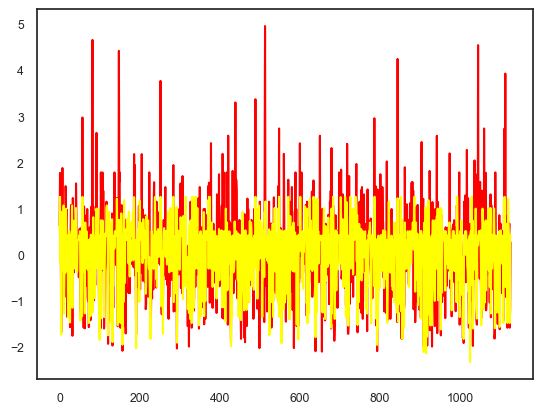

In [176]:
plt.plot(tahmin_df["Gerçek Y"], "red")
plt.plot(tahmin_df["Tahmin Y"], "yellow")